# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Import API key
from api_keys import api_key



In [2]:
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
#Create dataframe for cities and its coordinates
cities_df = pd.DataFrame(columns=["City", "Country"])

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Build the target URL for API Calls:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  

    
    # Try statement to append calls where value is found 
    try: 
        response = requests.get(f"{url}&q={city}").json()

        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    #If no record found "skip" to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Neuquen
Processing Record 2 | Jumla
Processing Record 3 | Hermanus
Processing Record 4 | Port Alfred
City not found. Skipping...
Processing Record 5 | Sao Filipe
Processing Record 6 | Sovetskiy
City not found. Skipping...
Processing Record 7 | Barrow
Processing Record 8 | Esmeraldas
Processing Record 9 | Faanui
Processing Record 10 | Sitka
Processing Record 11 | Guhagar
Processing Record 12 | San Rafael
Processing Record 13 | Yellowknife
Processing Record 14 | Punta Arenas
Processing Record 15 | Vaini
Processing Record 16 | Sechura
Processing Record 17 | Kieta
Processing Record 18 | Upernavik
Processing Record 19 | Rincon
Processing Record 20 | Loreto
Processing Record 21 | San Andres
Processing Record 22 | Albany
City not found. Skipping...
Processing Record 23 | Rikitea
Processing Record 24 | Jati
Processing Record 25 | Butaritari
Processing Record 26 | Ushuaia
Processing Record 27 | Kapaa
Processing Recor

Processing Record 226 | Pevek
Processing Record 227 | Beloha
Processing Record 228 | Jalpan
Processing Record 229 | Linda
Processing Record 230 | Nushki
Processing Record 231 | Provideniya
Processing Record 232 | Yerbogachen
City not found. Skipping...
Processing Record 233 | Huaiyuan
Processing Record 234 | Cap Malheureux
Processing Record 235 | Constitucion
Processing Record 236 | Ostrovnoy
Processing Record 237 | Freetown
Processing Record 238 | Komsomolskiy
Processing Record 239 | Bathsheba
Processing Record 240 | Khatanga
Processing Record 241 | Marsh Harbour
Processing Record 242 | Iqaluit
Processing Record 243 | Candolim
Processing Record 244 | Falun
Processing Record 245 | Moron
Processing Record 246 | Coahuayana
Processing Record 247 | Manicore
Processing Record 248 | Mendeleyevo
Processing Record 249 | Ludvika
Processing Record 250 | Bolton
Processing Record 251 | Rodrigues Alves
City not found. Skipping...
Processing Record 252 | Ulaanbaatar
City not found. Skipping...
Proce

Processing Record 444 | San Angelo
Processing Record 445 | Grand Baie
Processing Record 446 | Ucluelet
Processing Record 447 | Saldanha
Processing Record 448 | Axim
Processing Record 449 | Gabriel Leyva Solano
Processing Record 450 | Kuhdasht
Processing Record 451 | Mandalgovi
Processing Record 452 | Lebu
Processing Record 453 | Olinda
City not found. Skipping...
Processing Record 454 | Najran
Processing Record 455 | Acajutla
Processing Record 456 | Burns Lake
City not found. Skipping...
Processing Record 457 | Senanga
Processing Record 458 | Jos
Processing Record 459 | Port Macquarie
Processing Record 460 | Kudahuvadhoo
Processing Record 461 | Gairatganj
Processing Record 462 | Vasteras
Processing Record 463 | Ixtapa
Processing Record 464 | Ewa Beach
Processing Record 465 | Margate
Processing Record 466 | Atambua
Processing Record 467 | Rajula
Processing Record 468 | Torbay
Processing Record 469 | Muros
Processing Record 470 | Carballo
City not found. Skipping...
Processing Record 471

In [9]:
# Perform a weather check on each city using a series of successive API calls.


# Include a print log of each city as it's being processed (with the city number and city name).

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | bisignano
Processing Record 4 of Set 1 | bengkulu
City not found. Skipping...
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | ahipara
Processing Record 8 of Set 1 | lebu
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | ashland
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | haines junction
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | salalah
Processing Record 16 of Set 1 | port macquarie
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | srednekolymsk
Processing Record 22 of Set 1 | busselton
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}


# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display the DataFrame
weather_data.count()



City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [ ]:
# Export the city data into a .csv.

# Display the DataFrame

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [23]:

# Export the city data into a .csv.
weather_data.to_csv('weather_data.csv')

# Display the DataFrame
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Neuquen,0,AR,1554768000,55,-38.95,-68.06,66.20,3.36
1,Jumla,0,NP,1554772822,86,29.28,82.18,28.78,2.04
2,Hermanus,88,ZA,1554772552,92,-34.42,19.24,66.00,2.89
3,Port Alfred,0,ZA,1554772339,95,-33.59,26.89,63.00,3.60
4,Sao Filipe,0,CV,1554772277,95,14.90,-24.50,71.98,14.79


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

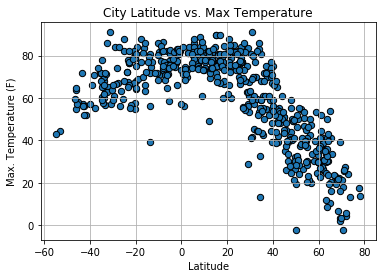

In [24]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",edgecolor='black', s=40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

### Analytical comment
the mid-latitude countries (in the equator, pues) have higher temperatures that countries in higher latitudes

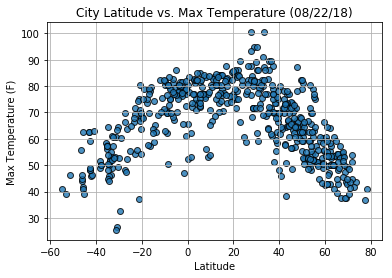

#### Latitude vs. Humidity Plot

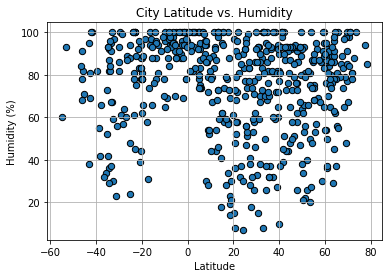

In [26]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolor='black', s=40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_vs_Latitude.png")

# Show plot
plt.show()

### Analytical Comments 
Latitute and Humidity are not related. This makes sense, as one would expect humidity to be more closely correlated with proximity to bodies of water 

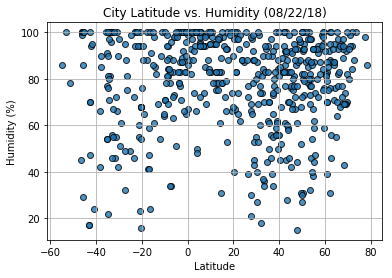

#### Latitude vs. Cloudiness Plot

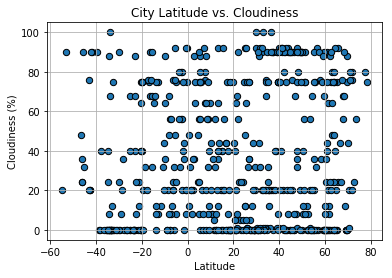

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolor='black', s=40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

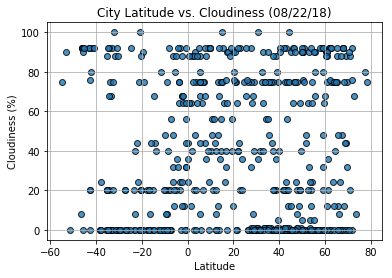

#### Latitude vs. Wind Speed Plot

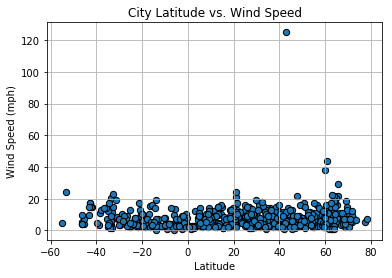

In [28]:

# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolor='black', s=40)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

#### Analytical Comment
Wind speed and Latitute are unrelated. 

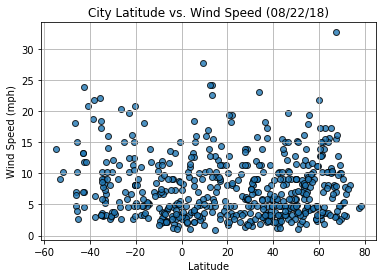